In [1]:
#필요한 데이터 파일 업로드

import pandas as pd

SAP = pd.read_csv('./대기오염물질배출시설설치사업장목록_20211101.csv')
#SAP는 Sources of air pollutants nationwide의 약자 : 전국 대기오염물질 배출시설 설치 사업장 
#datatype관련 오류 때문에 불필요한 column 일부 엑셀 파일에서 직접 삭제

DUM = pd.read_csv('./동읍면단위_미세먼지지수_정보_201127.csv')
#DUM은 동읍면의 영어 이니셜(Dong, Ueb, Meun)

ADD = pd.read_csv('./주소코드_202106.csv')
#ADD는 Address의 약자 : SAP과 DUM을 연결하기 위해 ADD의 주소코드 꼭 필요

#복붙
print('추출 전 표본의 크기 : ',len(SAP))
print('추출 후 표본의 크기 : ',len(SAP))
print('--------------------------------------------------------------------------------')

추출 전 표본의 크기 :  120200
추출 후 표본의 크기 :  120200
--------------------------------------------------------------------------------


In [2]:
#데이터셋에서 필요한 columns만 추출 후 변수에 저장

SAP.rename(columns={'소재지전체주소':'주소'}, inplace=True)

SAP = SAP[['인허가일자', '영업상태명', '상세영업상태명', '주소', '사업장명']]

DUM.rename(columns={'adstrd_cd':'주소코드',
                    'adstrd_nm':'동읍면주소',
                    'minu_dust_qy':'동읍면미세먼지'}, inplace=True)

DUM = DUM[['주소코드', '동읍면주소', '동읍면미세먼지']]

ADD = pd.DataFrame(data={'주소코드' : ADD['시도코드']*100000+ADD['시군구코드']*100+ADD['읍면동코드'],
                             '주소' : ADD['시도명칭'] + ' ' + ADD['시군구명칭'] + ' ' + ADD['읍면동명칭']},
                       columns=['주소코드', '주소'])

In [3]:
# 각 데이터셋의 shape와 head 출력 확인

print(SAP.shape) # 표본이 12만개로 꽤 많은 수치이다.
print(SAP.head())
print('--------------------------------------------------------------------------------')
print(DUM.shape) # 데이터에 일부 누락주소가 있어 ADD와 행갯수 차이가 있음
print(DUM.head())
print('--------------------------------------------------------------------------------')
print(ADD.shape)
print(ADD.head())

(120200, 5)
      인허가일자 영업상태명 상세영업상태명                     주소           사업장명
0  20151208    폐업      폐업                    NaN  (주)신세계 청운동체육관
1  19991119    폐업      폐업  서울특별시 종로구 관수동 130-2번지           광명기획
2  19991119    폐업      폐업    서울특별시 종로구 관수동 140번지         서울잔넬코팅
3  19991229    폐업      폐업  서울특별시 종로구 관수동 113-1번지          삼우특수칠
4  19991229    폐업      폐업  서울특별시 종로구 관수동 413-7번지             대성
--------------------------------------------------------------------------------
(3338, 3)
      주소코드 동읍면주소  동읍면미세먼지
0  1101053   사직동   226.21
1  1101054   삼청동   131.96
2  1101055   부암동    55.32
3  1101056   평창동    36.46
4  1101057   무악동    18.85
--------------------------------------------------------------------------------
(3501, 2)
      주소코드             주소
0  1101053  서울특별시 종로구 사직동
1  1101054  서울특별시 종로구 삼청동
2  1101055  서울특별시 종로구 부암동
3  1101056  서울특별시 종로구 평창동
4  1101057  서울특별시 종로구 무악동


In [4]:
#SAP에서 정상 영업 중인 공장만 추출

print('추출 전 표본의 크기 : ', len(SAP))

SAP = SAP.dropna(axis=0)
indexnames = SAP[SAP['영업상태명'] != '영업/정상'].index
SAP.drop(indexnames, inplace=True)
indexnames = SAP[SAP['상세영업상태명'] != '영업'].index

SAP.drop(indexnames, inplace=True)
SAP = SAP.reset_index(drop=False, inplace=False)
SAP.drop(['index'], axis=1, inplace = True)

print('추출 후 표본의 크기 : ',len(SAP))
# 표본의 갯수가 12만여개에서 7만여개로 감소

추출 전 표본의 크기 :  120200
추출 후 표본의 크기 :  70925


In [5]:
# 4단어 이상의 주소를 처리하기 위해 word4_add 생성

word4_add = []
for i in range(len(ADD)):
    tmp_add = ADD['주소'][i].split()
    if len(tmp_add)>=4:
        word4_add.append(ADD['주소'][i])
print(len(word4_add))

416


In [6]:
# SAP에서 2단어 이하의 잘못된 주소를 가진 행 제거

print('추출 전 표본의 크기 : ',len(SAP))

for i in range(len(SAP)):
    block_add = SAP['주소'][i].split()
    if len(block_add)<=2:
        SAP.drop([i], inplace=True)
SAP = SAP.reset_index(drop=False, inplace=False)
SAP.drop(['index'], axis=1, inplace = True)

print('추출 후 표본의 크기 : ',len(SAP))
#표본 12개 감소

추출 전 표본의 크기 :  70925
추출 후 표본의 크기 :  70913


In [7]:
# SAP 주소 데이터 필요한 부분만 추출 처리

ref_add = []
for i in range(len(SAP)):
    flag = 1
    block_add = SAP['주소'][i].split()
    if len(block_add)>=4:
        tmp_add = block_add[0]+' '+block_add[1]+' '+block_add[2]+' '+ block_add[3]
        for j in range(len(word4_add)):
            if tmp_add == word4_add[j]:
                ref_add.append(tmp_add)
                flag=0
                break
    if flag:
        tmp_add = block_add[0]+' '+block_add[1]+' '+block_add[2]
        ref_add.append(tmp_add)
SAP = SAP.assign(주소 = ref_add)

In [8]:
# DUM의 측정 일자가 20201127이므로 이에 맞춰 SAP 추출

print('추출 전 표본의 크기 : ',len(SAP))
print(SAP['인허가일자'].max())

SAP = SAP[SAP['인허가일자']<=20201127]
SAP.drop(['인허가일자', '영업상태명', '상세영업상태명'], axis=1, inplace=True)
SAP = SAP.reset_index(drop=False, inplace=False)
SAP.drop(['index'], axis=1, inplace = True)

print('추출 후 표본의 크기 : ',len(SAP))
print(SAP)

추출 전 표본의 크기 :  70913
20211029
추출 후 표본의 크기 :  67887
                  주소             사업장명
0        경기도 김포시 대곶면         (주)이현코리아
1        경기도 고양시 덕양구  롯데쇼핑(주) 롯데마트화정점
2      대구광역시 달성군 구지면          대도토건(주)
3        경기도 광주시 초월읍         (주)라임비앤디
4        경기도 광주시 도척면        (주)유니스아이디
...              ...              ...
67882   인천광역시 서구 청라동            (주)서일
67883   인천광역시 서구 가좌동         (주)엘더스테크
67884  인천광역시 남동구 남촌동         (주)은성프레임
67885  인천광역시 계양구 서운동      (주)테크노몰드이엔지
67886    경기도 성남시 중원구              일성카

[67887 rows x 2 columns]


In [9]:
# SAP의 주소로 ADD의 주소를 search할때 사용할 AVL tree code

# 중첩 for문으로 60000여개의 이상의 자료를 3000개의 자료에서 search하다 보니
# 시간이 너무 오래걸리는 문제가 발생, 이를 해결하기위해
# 자료구조시간에 배운 AVL tree활용 : 소요시간이 획기적으로 단축됨.

# 구글에서 찾은 AVL tree 코드에 내가 직접 작성한 Binary Search code를 추가 수정
# AVL tree 코드 출처 : https://8iggy.tistory.com/111 

class TreeNode:
    def __init__(self, val=None, val2=None, left=None, right=None, height=1):
        self.val = val
        self.val2 = val2
        self.left = left
        self.right = right
        self.height = height # 높이를 뜻하는 height 속성 추가 기본값=1
        
    def setData(self, val):
        self.data = val # data 대입
        
    def setData2(self, val):
        self.data2 = val # data2 대입

    def setLeft(self, l):
        self.left = l # left node에 숫자 대입

    def setRight(self, r):
        self.right = r # right node에 숫자 대입

    def getData(self):
        return self.val # data 반환
    
    def getData2(self):
        return self.val2 # data2 반환

    def getLeft(self):
        return self.left # left node 반환

    def getRight(self):
        return self.right # right node 반환

class AVLtree:
    def __init__(self, val, val2):
        self.root = TreeNode(val, val2)
 
    def setRoot(self, node):
        self.root = node

    def getRoot(self):
        return self.root

    def isEmpty(self):
        return self.root == None

    def insert(self, val, val2):
        self.root = self._insert_node(self.root, val, val2)
 
    def _insert_node(self, cur, val, val2):
        if not cur:
            return TreeNode(val, val2)
        elif val < cur.val:
            cur.left = self._insert_node(cur.left, val, val2)
        elif val > cur.val:
            cur.right = self._insert_node(cur.right, val, val2)
 
        cur.height = 1 + max(self._get_height(cur.left),
                             self._get_height(cur.right))
 
        balance = self._get_balance(cur)
        if balance > 1 and val > cur.left.val: # Left-Right case
            cur.left = self._left_rotate(cur.left)
            cur = self._right_rotate(cur)
 
        elif balance > 1 and val < cur.left.val: # Left-Left case
            cur = self._right_rotate(cur)
 
        elif balance < -1 and val > cur.right.val: # Right-Right case
            cur = self._left_rotate(cur)
 
        elif balance < -1 and val < cur.right.val: # Right-Left case
            cur.right = self._right_rotate(cur.right)
            cur = self._left_rotate(cur)
        return cur

    def search(self, key):
        node = self.search1(self.getRoot(), key)
        if node != None:
            return node
        else:
            node0 = TreeNode(None, None)
            return node0


    def search1(self, n, key):
        if n == None:
            return None
        if key == n.getData():
            #print('key와 동일n 찾기 성공')
            return n
        elif key < n.getData():
            #print('left', end='')
            return self.search1(n.getLeft(), key);
        else:
            #print('right', end='')
            return self.search1(n.getRight(), key);
    
    def _find_predecessor(self, cur):
        if cur.right:
            return self._find_predecessor(cur.right)
        else:
            return cur.val
 
    def _left_rotate(self, cur):
        v = cur
        w = cur.right
        t = w.left
        cur = w
        w.left = v
        v.right = t
        v.height = 1 + max(self._get_height(v.left), self._get_height(v.right))
        w.height = 1 + max(self._get_height(w.left), self._get_height(w.right))
        return cur
 
    def _right_rotate(self, cur):
        v = cur
        w = cur.left
        t2 = w.right
        cur = w
        w.right = v
        v.left = t2
        v.height = 1 + max(self._get_height(v.left), self._get_height(v.right))
        w.height = 1 + max(self._get_height(w.left), self._get_height(w.right))
        return cur
 
    def _get_height(self, cur):
        if not cur:
            return 0
        return cur.height
 
    def _get_balance(self, cur):
        if not cur:
            return 0
        return self._get_height(cur.left) - self._get_height(cur.right)

In [10]:
# SAP의 주소를 ADD 트리에서 검색해 주소코드를 가져와 SAP에 저장하는 작업

print('추출 전 표본의 크기 : ',len(SAP))

tree_ADD = AVLtree(ADD['주소'][0], ADD['주소코드'][0])
for i in range(1, len(ADD)):
    tree_ADD.insert(ADD['주소'][i], ADD['주소코드'][i])
    
get_code = []
for i in range(len(SAP)):
    k = tree_ADD.search(SAP['주소'][i])
    if k == None:
        get_code.append('')
    else:
        get_code.append(k.getData2())
        
SAP = SAP.assign(주소코드 = get_code)
SAP = SAP.dropna(axis=0)
SAP = SAP.reset_index(drop=False, inplace=False)
SAP.drop(['index'], axis=1, inplace = True)
SAP = SAP.astype({'주소코드': 'int'})

print('추출 후 표본의 크기 : ',len(SAP))
# 여기서 표본인 6만 여개에서 4만 여개 로 크개 주는데 그 이유는 주소값의 불분명성 때문임
# ex) 경기도 안산시 단원구 화정동 : 경기도 안산시 단원구 화정1동

추출 전 표본의 크기 :  67887
추출 후 표본의 크기 :  41921


In [11]:
# SAP의 주소코드로 DUM에서 미세먼지지수 정보를 가져오는 작업

print('추출 전 표본의 크기 : ',len(SAP))

get_dust = []
tree_DUM = AVLtree(DUM['주소코드'][0], DUM['동읍면미세먼지'][0])
for i in range(1, len(DUM)):
    tree_DUM.insert(DUM['주소코드'][i], DUM['동읍면미세먼지'][i])
    
for i in range(len(SAP)):
    k = tree_DUM.search(SAP['주소코드'][i])
    if k == None:
        get_dust.append('')
    else:
        get_dust.append(k.getData2())
SAP = SAP.assign(미세먼지지수 = get_dust)

SAP = SAP.dropna(axis=0)
SAP = SAP.reset_index(drop=False, inplace=False)
SAP.drop(['index'], axis=1, inplace = True)

print('추출 후 표본의 크기 : ',len(SAP))
#여기서 표본의 개숫가 400여개 감소하는데 그 이유는 DUM의 일부 주소 누락 때문임

추출 전 표본의 크기 :  41921
추출 후 표본의 크기 :  40544


In [12]:
# 공장과 전체지역의 미세먼지 지수의 mean값, max값, min값, std값

print('공장 미세먼지지수 평균값 : ', SAP['미세먼지지수'].mean())
print('전체 미세먼지지수 평균값 : ', DUM['동읍면미세먼지'].mean())
print()

print('공장 미세먼지지수 최대값 : ', SAP['미세먼지지수'].max())
print('전체 미세먼지지수 최대값 : ', DUM['동읍면미세먼지'].max())
print()

print('공장 미세먼지지수 최소값 : ', SAP['미세먼지지수'].min())
print('전체 미세먼지지수 최소값 : ', DUM['동읍면미세먼지'].min())
print()

print('공장 미세먼지지수 표준편차 : ', SAP['미세먼지지수'].std())
print('전체 미세먼지지수 표준편차 : ', DUM['동읍면미세먼지'].std())

# 공장지역의 미세먼지지수 평균값이
#일반지역의 미세먼지지수 평균값보다 2배 가까이 높음을 확인할 수 있음 

공장 미세먼지지수 평균값 :  223.97269978292542
전체 미세먼지지수 평균값 :  118.60134511683783

공장 미세먼지지수 최대값 :  702.12
전체 미세먼지지수 최대값 :  702.12

공장 미세먼지지수 최소값 :  12.52
전체 미세먼지지수 최소값 :  9.9

공장 미세먼지지수 표준편차 :  110.88217458972946
전체 미세먼지지수 표준편차 :  110.41138089139504


In [13]:
# 호흡기 질환 관련 지표 데이터와 시군구 인구수 데이터
# 동읍면이 아니라 시군구 인구수 데이터를 사용하는 이유는 RDD가 시군구 기준 데이터이기 때문

RDD = pd.read_csv('./미세먼지_관련_질병_지역별_통계_201211.csv')
# RDD는 Regional Dust relation Disease의 약자 : 지역별 미세먼지 관련 질병 지표

PBC = pd.read_csv('./행정구역_시군구_별_주민등록인구_20211126.csv')
# PBC는 Population by city의 약자 : 시군구별 인구수

In [14]:
# 새로운 데이터셋의 columns 이름 수정후 필요한 columns만 추출

RDD.rename(columns={'ctprvn_nm':'시도 명',
                    'signgu_nm':'시군구 명',
                    'clnic_room_nmpr_co':'진료실인원수',
                    'hsptlz_de_co':'입내원일수',
                    'clnic_ct':'진료비'}, inplace=True)
RDD = RDD[['시도 명', '시군구 명', '진료실인원수', '입내원일수', '진료비']]

PBC.rename(columns={'행정구역(시군구)별':'시군구 명',
                    '총인구수 (명)':'인구수',}, inplace=True)
PBC = PBC[['시군구 명', '인구수', '소속구수']]


In [15]:
# 각 데이터셋의 shape와 head 출력 확인

print(RDD.shape) # 표본이 12만개로 꽤 많은 수치이다.
print(RDD.head())
print('--------------------------------------------------------------------------------')
print(PBC.shape) # 데이터에 일부 누락주소가 있어 ADD와 행갯수 차이가 있음
print(PBC.head())

(33758, 5)
    시도 명 시군구 명  진료실인원수  입내원일수          진료비
0  인천광역시  미추홀구       5      5    1125580.0
1  인천광역시  미추홀구       1      6     764200.0
2  인천광역시  미추홀구       1      1      51650.0
3  인천광역시  미추홀구     104    490  209414800.0
4  인천광역시  미추홀구      20     67   26062940.0
--------------------------------------------------------------------------------
(282, 3)
   시군구 명       인구수  소속구수
0     전국  51327916     0
1  서울특별시  10103233    25
2    종로구    156993     0
3     중구    128065     0
4    용산구    235951     0


In [16]:
# RDD의 동일 시군구의 각 지표 통합

RDD.groupby(['시도 명', '시군구 명'])[['진료실인원수', '입내원일수', '진료비']].sum()
RDD = RDD[RDD['시군구 명'] != '합계']
RDD = RDD.reset_index(drop=False, inplace=False)
RDD.drop(['index'], axis=1, inplace = True)
tmp_RDD=RDD.groupby(['시도 명', '시군구 명'])[['진료실인원수', '입내원일수', '진료비']].sum()
RDD = pd.DataFrame(tmp_RDD)
RDD = RDD.reset_index()

print(RDD)

     시도 명    시군구 명  진료실인원수    입내원일수           진료비
0     강원도      강릉시  283040   899145  5.694139e+10
1     강원도      고성군   41535   146043  9.120772e+09
2     강원도      동해시  155292   548200  3.037064e+10
3     강원도      삼척시  106624   380919  2.293942e+10
4     강원도      속초시  103820   390483  2.125387e+10
..    ...      ...     ...      ...           ...
237  충청북도  청주시 상당구  269992   885028  4.595111e+10
238  충청북도  청주시 서원구  344038  1091062  5.398798e+10
239  충청북도  청주시 청원구  294018   957562  4.682910e+10
240  충청북도  청주시 흥덕구  401164  1266756  6.154036e+10
241  충청북도      충주시  308037  1029020  6.142344e+10

[242 rows x 5 columns]


In [17]:
# RDD 지표 인구수로 나눠 저장 > 인구수 대비 각 지표값을 알 수 있음

get_jin = []
get_yip = []
get_cost = []
for i in range(len(tmp_RDD)):
    for j in range(len(PBC)):
        if PBC['시군구 명'][j] == RDD['시도 명'][i]:
            for k in range(j + 1, j + 1 + PBC['소속구수'][j]):
                if PBC['시군구 명'][k] in RDD['시군구 명'][i]:
                    if PBC['소속구수'][k] == 0:
                        get_jin.append(RDD['진료실인원수'][i] / PBC['인구수'][k])
                        get_yip.append(RDD['입내원일수'][i] / PBC['인구수'][k])
                        get_cost.append(RDD['진료비'][i] / PBC['인구수'][k])
                        break
                    elif PBC['소속구수'][k] != 0:
                        for l in range(k+1, k + 1 + PBC['소속구수'][k]):
                            if PBC['시군구 명'][l] in RDD['시군구 명'][i]:
                                get_jin.append(RDD['진료실인원수'][i] / PBC['인구수'][l])
                                get_yip.append(RDD['입내원일수'][i] / PBC['인구수'][l])
                                get_cost.append(RDD['진료비'][i] / PBC['인구수'][l])
                                break
                        break

RDD = RDD.assign(인구대비진료실인원수 = get_jin)
RDD = RDD.assign(인구대비입내원일수 = get_yip)
RDD = RDD.assign(인구대비진료비 = get_cost)
RDD = RDD.reset_index(drop=False, inplace=False)
RDD.drop(['index'], axis=1, inplace = True)
RDD = RDD[['시도 명', '시군구 명', '인구대비진료실인원수', '인구대비입내원일수', '인구대비진료비']]

print(RDD)

     시도 명    시군구 명  인구대비진료실인원수  인구대비입내원일수        인구대비진료비
0     강원도      강릉시    1.311542   4.166431  263853.290394
1     강원도      고성군    1.372196   4.824837  301323.860055
2     강원도      동해시    1.642224   5.797255  321171.716229
3     강원도      삼척시    1.474459   5.267569  317219.579888
4     강원도      속초시    1.259462   4.737032  257835.219818
..    ...      ...         ...        ...            ...
237  충청북도  청주시 상당구    1.501691   4.922510  255579.289624
238  충청북도  청주시 서원구    1.530915   4.855055  240238.046296
239  충청북도  청주시 청원구    1.680343   5.472565  267633.084955
240  충청북도  청주시 흥덕구    1.591750   5.026271  244181.621969
241  충청북도      충주시    1.477204   4.934709  294558.692400

[242 rows x 5 columns]


In [18]:
# SAP에 RDD의 지표들을 삽입하는 과정

get_num = []
get_date = []
get_cost = []
print('추출 전 표본의 크기 : ',len(SAP))

tree_RDD1 = AVLtree((RDD['시도 명'][0]+RDD['시군구 명'][0]).replace(' ',''), RDD['인구대비진료실인원수'][0])
for i in range(1, len(RDD)):
    tree_RDD1.insert((RDD['시도 명'][i]+RDD['시군구 명'][i]).replace(' ',''), RDD['인구대비진료실인원수'][i])

tree_RDD2 = AVLtree((RDD['시도 명'][0]+RDD['시군구 명'][0]).replace(' ',''), RDD['인구대비입내원일수'][0])
for i in range(1, len(RDD)):
    tree_RDD2.insert((RDD['시도 명'][i]+RDD['시군구 명'][i]).replace(' ',''), RDD['인구대비입내원일수'][i])

tree_RDD3 = AVLtree((RDD['시도 명'][0]+RDD['시군구 명'][0]).replace(' ',''), RDD['인구대비진료비'][0])
for i in range(1, len(RDD)):
    tree_RDD3.insert((RDD['시도 명'][i]+RDD['시군구 명'][i]).replace(' ',''), RDD['인구대비진료비'][i])


for i in range(len(SAP)):
    set_add = SAP['주소'][i].split()
    if len(set_add) == 3:
        tmp_add = set_add[0]+set_add[1]
    else:
        tmp_add = set_add[0]+set_add[1]+set_add[2]
    k1 = tree_RDD1.search(tmp_add)
    if k1 == None:
        get_num.append('')
    else:
        get_num.append(k1.getData2())
    k2 = tree_RDD2.search(tmp_add)
    if k2 == None:
        get_date.append('')
    else:
        get_date.append(k2.getData2())
    k3 = tree_RDD3.search(tmp_add)
    if k3 == None:
        get_cost.append('')
    else:
        get_cost.append(k3.getData2())
        

SAP = SAP.assign(진료실인원수 = get_num)
SAP = SAP.assign(입내원일수 = get_date)
SAP = SAP.assign(진료비 = get_cost)
SAP = SAP.dropna(axis=0)
SAP = SAP.reset_index(drop=False, inplace=False)
SAP.drop(['index'], axis=1, inplace = True)

print('추출 후 표본의 크기 : ',len(SAP))
# 표본의 크기가 약간 줄어드는데 그 이유는 RDD에 주소 누락값이 존재하기 때문이다.

추출 전 표본의 크기 :  40544
추출 후 표본의 크기 :  39782


In [19]:
# 필수 수행 요소 1번 : SAP test
SAP_test = SAP.groupby('주소').filter(lambda g : len(g)> 25)
SAP_test.to_csv('tmp_sample1.csv')
SAP_test = pd.read_csv('tmp_sample1.csv')
SAP_test2=SAP_test.groupby('주소')[['미세먼지지수','진료실인원수','입내원일수','진료비']].mean()
print(SAP_test2)
SAP_test2.to_csv('tmp_sample2.csv')
SAP1 = pd.read_csv('tmp_sample2.csv')
print(SAP1)

                  미세먼지지수    진료실인원수     입내원일수            진료비
주소                                                         
강원도 강릉시 강동면       209.03  1.311542  4.166431  263853.290394
강원도 강릉시 사천면       189.18  1.311542  4.166431  263853.290394
강원도 강릉시 주문진읍      114.01  1.311542  4.166431  263853.290394
강원도 삼척시 도계읍       339.25  1.474459  5.267569  317219.579888
강원도 원주시 문막읍       202.24  1.489868  4.734665  260021.167795
...                  ...       ...       ...            ...
충청북도 청주시 흥덕구 강내면  298.58  1.591750  5.026271  244181.621969
충청북도 청주시 흥덕구 오송읍  283.63  1.591750  5.026271  244181.621969
충청북도 청주시 흥덕구 옥산면  309.56  1.591750  5.026271  244181.621969
충청북도 충주시 대소원면     243.25  1.477204  4.934709  294558.692400
충청북도 충주시 주덕읍      228.03  1.477204  4.934709  294558.692400

[336 rows x 4 columns]
                   주소  미세먼지지수    진료실인원수     입내원일수            진료비
0         강원도 강릉시 강동면  209.03  1.311542  4.166431  263853.290394
1         강원도 강릉시 사천면  189.18  1.311542  4.166431  263853.290394
2

In [20]:
# 공장전체와 공장밀집지역의 호흡기 질병 관련 지수의 mean값

print('공장전체 미세먼지지수 평균값 : ', SAP['미세먼지지수'].mean())
print('공장밀집지역 미세먼지지수 평균값 : ', SAP1['미세먼지지수'].mean())
print()

print('공장전체 진료실인원수 최대값 : ', SAP['진료실인원수'].mean())
print('공장밀집지역 진료실인원수 최대값 : ', SAP1['진료실인원수'].mean())
print()

print('공장전체 입내원일수 최소값 : ', SAP['입내원일수'].mean())
print('공장밀집지역 입내원일수 최소값 : ', SAP1['입내원일수'].mean())
print()

print('공장전체 진료비 표준편차 : ', SAP['진료비'].mean())
print('공장밀집지역 진료비 표준편차 : ', SAP1['진료비'].mean())

공장전체 미세먼지지수 평균값 :  223.91974033480207
공장밀집지역 미세먼지지수 평균값 :  231.06166666666655

공장전체 진료실인원수 최대값 :  1.5725532369903978
공장밀집지역 진료실인원수 최대값 :  1.5604779768276646

공장전체 입내원일수 최소값 :  5.387121172682567
공장밀집지역 입내원일수 최소값 :  5.391776404278032

공장전체 진료비 표준편차 :  295403.9448705151
공장밀집지역 진료비 표준편차 :  298534.5818270795


In [21]:
# 미세먼지지수 값 조정

dust_revise = []
for i in range(len(SAP)):
    dust_revise.append(SAP['미세먼지지수'][i] / SAP['미세먼지지수'].mean())
SAP['미세먼지지수'] = dust_revise
print(SAP)

# 진료실인원수 값 조정

num_revise = []
for i in range(len(SAP)):
    num_revise.append(SAP['진료실인원수'][i] / SAP['진료실인원수'].mean())
SAP['진료실인원수'] = num_revise

# 입내원일수 값 조정

date_revise = []
for i in range(len(SAP)):
    date_revise.append(SAP['입내원일수'][i] / SAP['입내원일수'].mean())
SAP['입내원일수'] = date_revise

# 진료비 값 조정

cost_revise = []
for i in range(len(SAP)):
    cost_revise.append(SAP['진료비'][i] / SAP['진료비'].mean())
SAP['진료비'] = cost_revise
print(SAP)

                     주소             사업장명     주소코드    미세먼지지수    진료실인원수  \
0           경기도 김포시 대곶면         (주)이현코리아  3123034  1.188060  1.667650   
1         대구광역시 달성군 구지면          대도토건(주)  2231036  1.357808  1.651507   
2           경기도 광주시 초월읍         (주)라임비앤디  3125012  1.122813  1.581691   
3           경기도 광주시 도척면        (주)유니스아이디  3125034  0.768847  1.581691   
4      충청북도 청주시 흥덕구 옥산면         에스와이티(주)  3304332  1.382460  1.591750   
...                 ...              ...      ...       ...       ...   
39777     광주광역시 광산구 하남동     (주)제이에스이노베이션  2405063  0.568105  1.669418   
39778     광주광역시 광산구 하남동          대성화학(주)  2405063  0.568105  1.669418   
39779      광주광역시 북구 양산동  해태아이스크림(주) 광주공장  2404080  0.221687  1.462495   
39780     광주광역시 광산구 하남동   (주)대창 광주지점 1공장  2405063  0.568105  1.669418   
39781     인천광역시 강화군 강화읍        (주)삼성산업기계  2331011  0.772330  1.351828   

          입내원일수            진료비  
0      5.553460  273994.394611  
1      5.714168  273421.472077  
2      4.753528  239964.

Text(0, 0.5, 'Medical expenses')

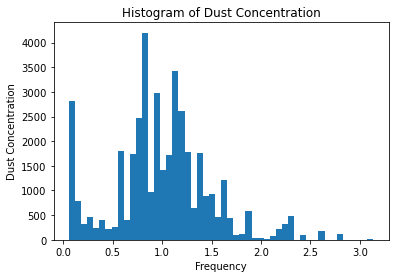

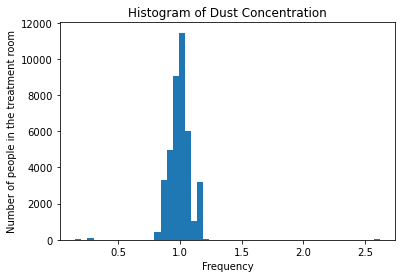

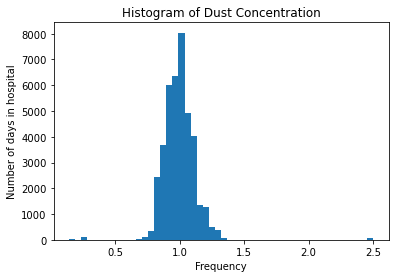

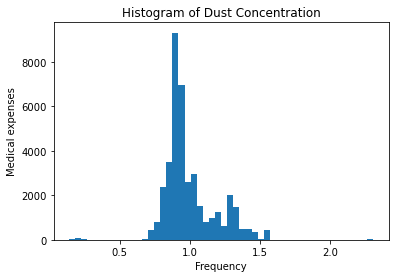

In [22]:
# SAP의 각 지표들의 히스토그램 작성

%matplotlib inline
import matplotlib.pyplot as plt

fig1= plt.figure()
axes1 = fig1.add_subplot(1, 1, 1)
axes1.hist(SAP['미세먼지지수'], bins = 50)
axes1.set_title('Histogram of Dust Concentration')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Dust Concentration')

fig2= plt.figure()
axes2 = fig2.add_subplot(1, 1, 1)
axes2.hist(SAP['진료실인원수'], bins = 50)
axes2.set_title('Histogram of Dust Concentration')
axes2.set_xlabel('Frequency')
axes2.set_ylabel('Number of people in the treatment room')

fig3= plt.figure()
axes3 = fig3.add_subplot(1, 1, 1)
axes3.hist(SAP['입내원일수'], bins = 50)
axes3.set_title('Histogram of Dust Concentration')
axes3.set_xlabel('Frequency')
axes3.set_ylabel('Number of days in hospital')

fig4= plt.figure()
axes4 = fig4.add_subplot(1, 1, 1)
axes4.hist(SAP['진료비'], bins = 50)
axes4.set_title('Histogram of Dust Concentration')
axes4.set_xlabel('Frequency')
axes4.set_ylabel('Medical expenses')

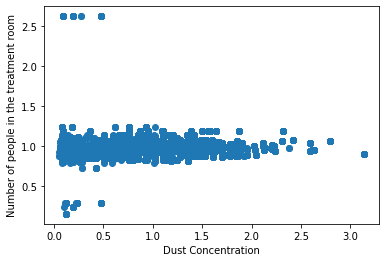

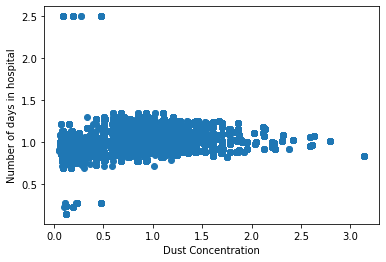

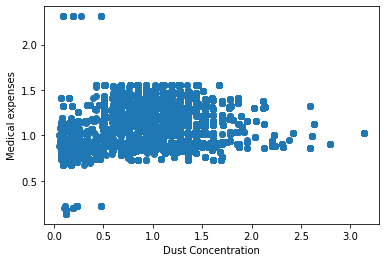

In [23]:
# SAP의 미세먼지지수와 나머지 지표들의 상관관계를 나타내는 산점도 그래프

fig5= plt.figure()
axes5 = fig5.add_subplot(1, 1, 1)
axes5.set_xlabel('Dust Concentration')
axes5.set_ylabel('Number of people in the treatment room')
axes5.plot(SAP['미세먼지지수'], SAP['진료실인원수'],'o')

fig6= plt.figure()
axes6 = fig6.add_subplot(1, 1, 1)
axes6.set_xlabel('Dust Concentration')
axes6.set_ylabel('Number of days in hospital')
axes6.plot(SAP['미세먼지지수'], SAP['입내원일수'],'o')

fig7= plt.figure()
axes7 = fig7.add_subplot(1, 1, 1)
axes7.set_xlabel('Dust Concentration')
axes7.set_ylabel('Medical expenses')
axes7.plot(SAP['미세먼지지수'], SAP['진료비'],'o')

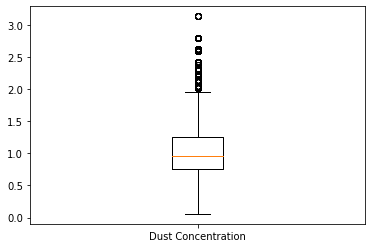

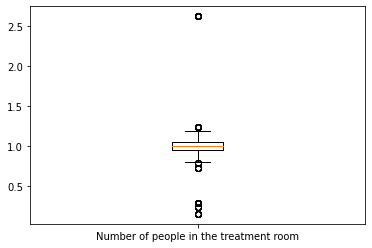

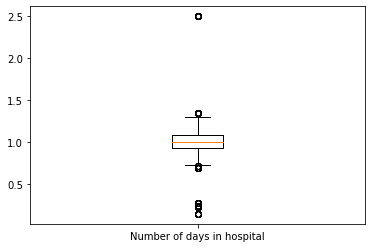

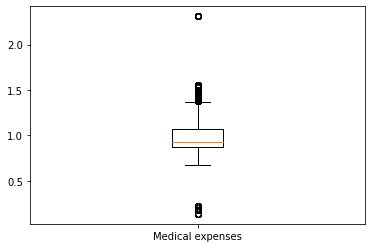

In [24]:
# box plot

plt.boxplot(SAP['미세먼지지수'])
plt.xticks([1], ['Dust Concentration'])
plt.show()
plt.boxplot(SAP['진료실인원수'])
plt.xticks([1], ['Number of people in the treatment room'])
plt.show()
plt.boxplot(SAP['입내원일수'])
plt.xticks([1], ['Number of days in hospital'])
plt.show()
plt.boxplot(SAP['진료비'])
plt.xticks([1], ['Medical expenses'])
plt.show()

In [25]:
# 이상치 제거
'''
quartile_1 = SAP.quantile(0.25)
quartile_3 = SAP.quantile(0.75)
IQR = quartile_3 - quartile_1
condition = (SAP < (quartile_1 - 1.5*IQR)) | (SAP > (quartile_3 + 1.5*IQR))
condition = condition.any(axis=1)
search_SAP = SAP[condition]
SAP = SAP.drop(search_SAP.index, axis=0)
print(len(SAP))'''

'\nquartile_1 = SAP.quantile(0.25)\nquartile_3 = SAP.quantile(0.75)\nIQR = quartile_3 - quartile_1\ncondition = (SAP < (quartile_1 - 1.5*IQR)) | (SAP > (quartile_3 + 1.5*IQR))\ncondition = condition.any(axis=1)\nsearch_SAP = SAP[condition]\nSAP = SAP.drop(search_SAP.index, axis=0)\nprint(len(SAP))'

In [26]:
# SAP을 train case와 test case로 분할

from sklearn.model_selection import train_test_split

X = SAP
SAP_train, SAP_test = train_test_split(X, test_size=0.24589, random_state=1)
print(len(SAP))
print(len(SAP_train))
print(len(SAP_test))

39782
30000
9782


[0.0462324]


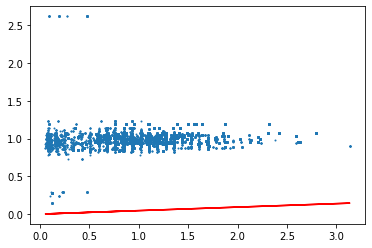

In [27]:
#Least Squares(Linear Regression)

import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

X = np.array(SAP_train['미세먼지지수']).reshape(-1,1)
y = SAP_train['진료실인원수']
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_)

w = lr.coef_[0]

plt.scatter(X, y, s=1)
plt.plot(X, w*X, c='red')

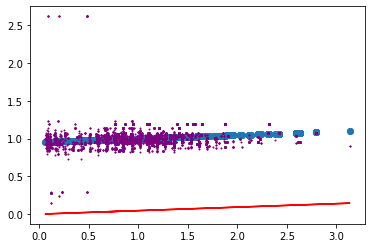

In [28]:
test_X = np.array(SAP_test['미세먼지지수']).reshape(-1,1)
pred_y = lr.predict(test_X)

plt.scatter(test_X, pred_y)
plt.plot(test_X, w*test_X, c='red')

test_y = SAP_test['진료실인원수']

plt.scatter(test_X, test_y, c='purple', s=1)

0.011904555848963126 0.012121092522335895


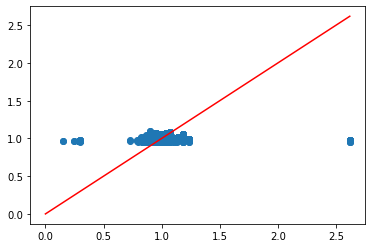

0.03852309839363122


In [29]:
#Model Evaluation Metrics / Loss-Regression

from sklearn.metrics import mean_squared_error
test_loss = mean_squared_error(test_y, pred_y)

train_y = lr.predict(X)
train_loss = mean_squared_error(y, train_y)

print(test_loss, train_loss)
plt.scatter(test_y, pred_y)
plt.plot([0,np.max(test_y)],[0,np.max(test_y)], color='red')
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(test_y, pred_y)
print(r2)

train loss;  0.23499253944520243
test loss;  0.23621275081471135
0.049738742343570896


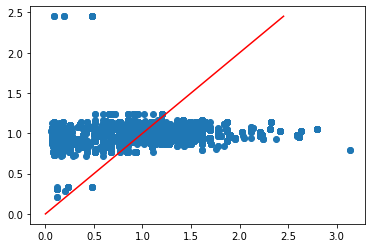

In [30]:
#모든 변수 이용
import numpy as np
from sklearn.linear_model import LinearRegression ######
from matplotlib import pyplot as plt

X = np.array(SAP_train.iloc[:,[4,5,6]])
#print(X)
y = SAP_train['미세먼지지수'] # column 3
lr = LinearRegression()
lr.fit(X, y)
#print(lr.coef_)

train_y = lr.predict(X)
train_loss = mean_squared_error(y, train_y)
print('train loss; ', train_loss)


test_X = np.array(SAP_test.iloc[:,[4,5,6]])
pred_y = lr.predict(test_X)
test_y = SAP_test['미세먼지지수'] # column 3

test_loss = mean_squared_error(test_y, pred_y)

print('test loss; ', test_loss)

plt.scatter(test_y, pred_y)
plt.plot([0,np.max(pred_y)],[0,np.max(pred_y)], color='red')

from sklearn.metrics import r2_score
r2 = r2_score(test_y, pred_y)
print(r2)

[ 0.14433458  1.05346181 -0.27320462]
train loss;  0.23499389855395802
test loss;  0.2362392886554282
0.0496319831537807


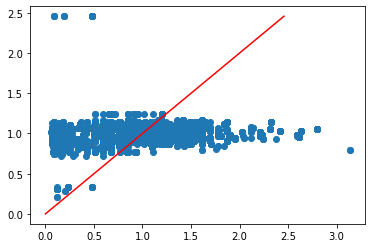

In [31]:
# Ridge regression

import numpy as np
from sklearn.linear_model import Ridge ##########
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = np.array(SAP_train.iloc[:,[4,5,6]])
#print(X)
y = SAP_train['미세먼지지수'] # column 3
Rr = Ridge(alpha=1) # --> Ridge 로 변경, lamda 값은 기본 1.0 부터 조정
Rr.fit(X, y)
print(Rr.coef_)

train_y = Rr.predict(X)
train_loss = mean_squared_error(y, train_y)
print('train loss; ', train_loss)


test_X = np.array(SAP_test.iloc[:,[4,5,6]])
pred_y = Rr.predict(test_X)
test_y = SAP_test['미세먼지지수'] # column 3

test_loss = mean_squared_error(test_y, pred_y)

print('test loss; ', test_loss)

plt.scatter(test_y, pred_y)
plt.plot([0,np.max(pred_y)],[0,np.max(pred_y)], color='red')

r2 = r2_score(test_y, pred_y)
print(r2)

In [32]:
import numpy as np
from sklearn.linear_model import Ridge #######
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = np.array(SAP_train.iloc[:,[4,5,6]])
y = SAP_train['미세먼지지수'] # column 3
test_X = np.array(SAP_test.iloc[:,[4,5,6]])
test_y = SAP_test['미세먼지지수'] # column 3

prev_best_r2 = 0.0
model_alpha = 1.0
loss = 0.0
for test_a in np.arange(-2000, 0, 1):
  Rr = Ridge(alpha=test_a) # --> Ridge 로 변경, lamda 값은 기본 1.0 부터 조정
  Rr.fit(X, y)

  pred_y = Rr.predict(test_X)

  train_loss = mean_squared_error(test_y, pred_y)
  r2 = r2_score(test_y, pred_y)
  if r2 > prev_best_r2:
    prev_best_r2 = r2
    model_alpha = test_a
    loss = train_loss
print("new best/ alpha: ", model_alpha, "r2: ", prev_best_r2, "loss: ", loss)


new best/ alpha:  -6 r2:  0.050221420440167086 loss:  0.23609276831512363


array([-0.11191702,  1.44995984, -0.45131211])

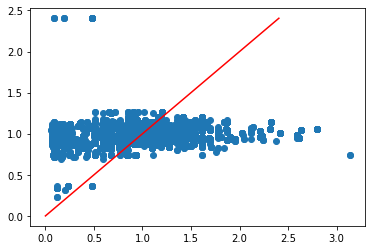

In [33]:
Rr = Ridge(alpha=-6) # --> Ridge 로 변경, lamda 값은 기본 1.0 부터 조정
Rr.fit(X, y)

pred_y = Rr.predict(test_X)
test_y = SAP_test['미세먼지지수'] # column 3

plt.scatter(test_y, pred_y)
plt.plot([0,np.max(pred_y)],[0,np.max(pred_y)], color='red')
Rr.coef_

In [34]:
#Lasso

from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)

import numpy as np
from sklearn.linear_model import Lasso #####
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = np.array(SAP_train.iloc[:,[4,5,6]])
y = SAP_train['미세먼지지수'] # column 3
test_X = np.array(SAP_test.iloc[:,[4,5,6]])
test_y = SAP_test['미세먼지지수'] # column 3

prev_best_r2 = 0.0
model_alpha = 1.0
loss = 0.0
for test_a in np.arange(0.1, 100, 0.1):
  LassoR = Lasso(alpha=test_a) # --> Ridge 로 변경, lamda 값은 기본 1.0 부터 조정
  LassoR.fit(X, y)

  pred_y = LassoR.predict(test_X)

  train_loss = mean_squared_error(test_y, pred_y)
  r2 = r2_score(test_y, pred_y)
  if r2 > prev_best_r2:
    prev_best_r2 = r2
    model_alpha = test_a
    loss = train_loss
print("new best/ alpha: ", model_alpha, "r2: ", prev_best_r2, "loss: ", loss)


new best/ alpha:  1.0 r2:  0.0 loss:  0.0


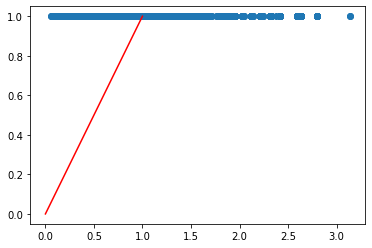

In [35]:
LassoR = Lasso(alpha=1) # --> Lasso 로 변경, lamda 값은 기본 1.0 부터 조정
LassoR.fit(X, y)

pred_y = LassoR.predict(test_X)

plt.scatter(test_y, pred_y)
plt.plot([0,np.max(pred_y)],[0,np.max(pred_y)], color='red')

[0.77738868 0.21350691]
[[ 0.26294381  0.53507761  0.80284027]
 [ 0.80921985  0.33081484 -0.48551496]]
(9782, 2)


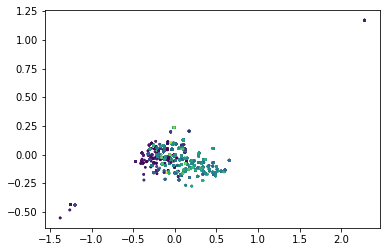

In [36]:
#principal component analysis(PCA)

import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
pca.fit(SAP_train.iloc[:,[4,5,6]])
print(pca.explained_variance_ratio_)
print(pca.components_)

pca_df = pca.transform(SAP_test.iloc[:,[4,5,6]])
print(pca_df.shape)

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=np.log(SAP_test['미세먼지지수'] + 1), s=3)

In [37]:
#Logistic Regression

X = np.array(SAP_train.iloc[:,[4,5,6]])
y = SAP_train['미세먼지지수'] # column 3
test_X = np.array(SAP_test.iloc[:,[4,5,6]])
test_y = SAP_test['미세먼지지수'] # column 3

median_room = np.median(y)
# 0 < median_room < 1

class_y = [1 if i > median_room else 0 for i in y]
print(class_y)

test_class_y = [1 if i > median_room else 0 for i in test_y]
print(test_class_y)

[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 

In [38]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, class_y)

predicted_y = clf.predict(test_X)
print(predicted_y)

predicted_prob_y = clf.predict_proba(test_X)
print(predicted_prob_y)

clf.score(test_X, test_class_y)
#Return the mean accuracy on the given test data and labels.

[1 0 1 ... 0 0 0]
[[0.38556691 0.61443309]
 [0.53925876 0.46074124]
 [0.39230756 0.60769244]
 ...
 [0.6864919  0.3135081 ]
 [0.65094442 0.34905558]
 [0.53688255 0.46311745]]


0.60233081169495

In [39]:
#ROC/AUC curv 그려보기

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_class_y, predicted_y)
print(confusion_matrix)

[[3034 1929]
 [1961 2858]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(test_class_y, predicted_y))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      4963
           1       0.60      0.59      0.60      4819

    accuracy                           0.60      9782
   macro avg       0.60      0.60      0.60      9782
weighted avg       0.60      0.60      0.60      9782



0.6021964487822044
[0.61443309 0.46074124 0.60769244 ... 0.3135081  0.34905558 0.46311745]


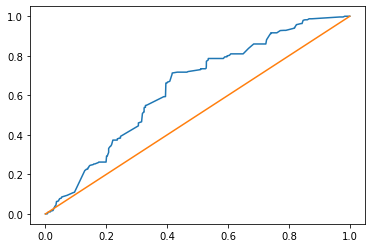

In [41]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_class_y, predicted_y)
fpr, tpr, thresholds = roc_curve(test_class_y, predicted_prob_y[:,1])
print(logit_roc_auc)
print(predicted_prob_y[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

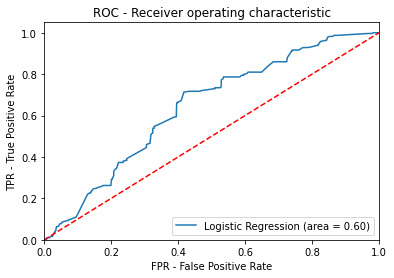

In [42]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_class_y, predicted_y)
fpr, tpr, thresholds = roc_curve(test_class_y, predicted_prob_y[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('ROC - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [43]:
#Support Vector Machine

from sklearn import svm

X = np.array(SAP_train.iloc[:,[3,4]])

clf = svm.SVC(kernel='poly')
clf.fit(X, class_y)
print(clf)

test_X = np.array(SAP_test.iloc[:,[3,4]])

predict_y = clf.predict(test_X)


SVC(kernel='poly')


In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(test_class_y, predict_y)
print(confusion_matrix)
print(classification_report(test_class_y, predict_y))

[[4963    0]
 [   0 4819]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4963
           1       1.00      1.00      1.00      4819

    accuracy                           1.00      9782
   macro avg       1.00      1.00      1.00      9782
weighted avg       1.00      1.00      1.00      9782



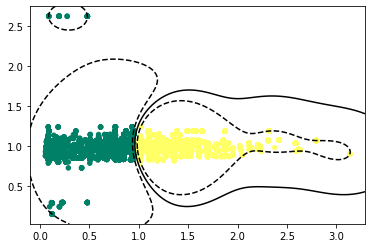

In [45]:
#시간 좀 많이 소요됨

from sklearn import svm
from matplotlib import pyplot as plt
import numpy as np


X = np.array(SAP_train.iloc[:,[3,4]])

clf = svm.SVC()
clf.fit(X, class_y)
#####

plt.scatter(X[:, 0], X[:, 1], c=class_y, s=20, cmap='summer')
#https://matplotlib.org/examples/color/colormaps_reference.html 에서 색 배합 확인 가능
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plot_x = np.linspace(xlim[0], xlim[1], 1000)
plot_y = np.linspace(ylim[0], ylim[1], 1000)
grid_Y, grid_X = np.meshgrid(plot_y, plot_x)
xy = np.vstack([grid_X.ravel(), grid_Y.ravel()]).T
P = clf.decision_function(xy).reshape(grid_X.shape)

# plot decision boundary and margins
ax.contour(grid_X, grid_Y, P, colors='black',
            levels=[-1, 0, 1], alpha=1,
            linestyles=['--', '-', '--'])

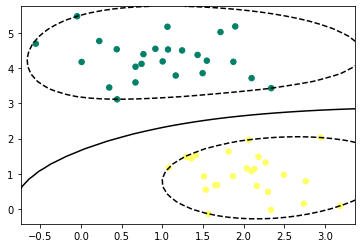

In [46]:
#SVM
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import svm

X, class_y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

clf = svm.SVC(kernel='rbf', C=1E10)
clf.fit(X, class_y)

plt.scatter(X[:, 0], X[:, 1], c=class_y, s=30, cmap='summer')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    # create grid to evaluate model
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
P = clf.decision_function(xy).reshape(X.shape)

# plot decision boundary and margins
ax.contour(X, Y, P, colors='black',
            levels=[-1, 0, 1], alpha=1,
            linestyles=['--', '-', '--'])

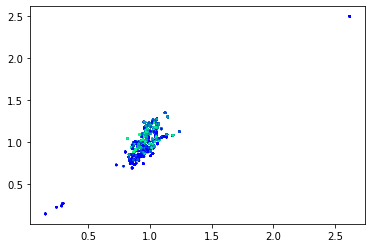

In [47]:
# Nearest Neighbor

import pandas
import numpy as np

X = np.array(SAP_train.iloc[:,[4,5,6]])
y = SAP_train['미세먼지지수'] # column 3
test_X = np.array(SAP_test.iloc[:,[4,5,6]])
test_y = SAP_test['미세먼지지수'] # column 3


from matplotlib import pyplot as plt

class_label = y
percent25 = np.percentile(class_label,25, axis=0)
percent50 = np.percentile(class_label,50, axis=0)
percent75 = np.percentile(class_label,75, axis=0)

class_label = [0 if j < percent25 else 1 if j < percent50 else 2 if j < percent75 else 3 for j in class_label]

plt.scatter(X[:,0], X[:,1],  c=class_label, s=2, cmap='winter')

In [48]:
test_class_label = test_y
test_class_label = [0 if j < percent25 else 1 if j < percent50 else 2 \
               if j < percent75 else 3 for j in test_class_label]

In [49]:
from sklearn import neighbors
weights = 'distance'
n_neighbors = 10
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, class_label)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [50]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(X, class_label)


NearestCentroid()

              precision    recall  f1-score   support

           0       0.40      0.68      0.51      2416
           1       0.22      0.11      0.14      2525
           2       0.34      0.35      0.34      2404
           3       0.32      0.26      0.29      2437

    accuracy                           0.35      9782
   macro avg       0.32      0.35      0.32      9782
weighted avg       0.32      0.35      0.32      9782



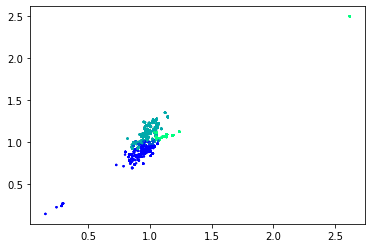

In [51]:
from sklearn.metrics import classification_report

predict_y = clf.predict(test_X)
#print(predict_y)

plt.scatter(test_X[:,0], test_X[:,1],  c=predict_y, s=2, cmap='winter')
print(classification_report(test_class_label, predict_y))

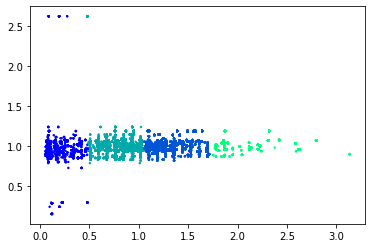

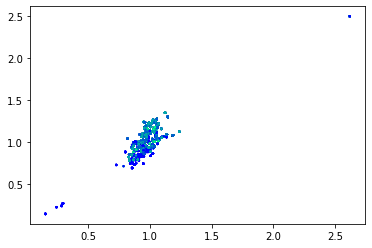

In [52]:
#k-means clustering

from sklearn.cluster import KMeans
import numpy as np

y = SAP_train.iloc[:,[3,4]]

kmeans = KMeans(n_clusters=4, random_state=0).fit(y)
train_cluster = kmeans.labels_
plt.scatter(y.iloc[:,0], y.iloc[:,1],  c=train_cluster, s=2, cmap='winter')
plt.show()
plt.scatter(X[:,0], X[:,1],  c=train_cluster, s=2, cmap='winter')
plt.show()


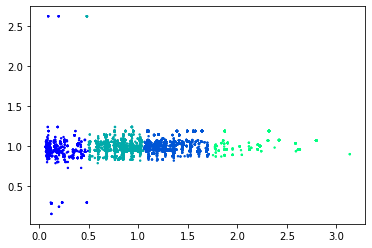

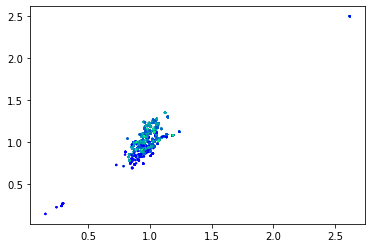

In [53]:
test_y = SAP_test.iloc[:,[3,4]]
test_cluster = (kmeans.predict(test_y))
plt.scatter(test_y.iloc[:,0], test_y.iloc[:,1],  c=test_cluster, s=2, cmap='winter')
plt.show()
plt.scatter(test_X[:,0], test_X[:,1],  c=test_cluster, s=2, cmap='winter')
plt.show()

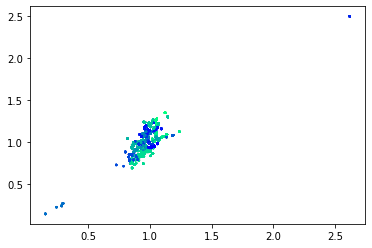

In [54]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=15, random_state=0).fit(X)
train_cluster = kmeans.labels_

plt.scatter(X[:,0], X[:,1],  c=train_cluster, s=2, cmap='winter')
plt.show()


In [55]:
# Decision Trees

# pip install graphviz
# 환경변수 C:\Users\user\anaconda3\Lib\site-packages\graphviz

# > 환경변수를 설정해도 작동되지 않음.

'''from sklearn import tree

X = [[0, 0], [1, 1], [0, 1], [1, 0]]
Y = [0, 1, 1, 0]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
#tree.plot_tree(clf)

print(clf.predict([[2., 2.]]))
print(clf.predict([[2., 0.]]))

print(clf.predict_proba([[2., 2.]]))
print(clf.predict_proba([[2., 0.]]))

#array([[0., 1.]])
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("c_house") 
graph'''

'from sklearn import tree\n\nX = [[0, 0], [1, 1], [0, 1], [1, 0]]\nY = [0, 1, 1, 0]\nclf = tree.DecisionTreeClassifier()\nclf = clf.fit(X, Y)\n#tree.plot_tree(clf)\n\nprint(clf.predict([[2., 2.]]))\nprint(clf.predict([[2., 0.]]))\n\nprint(clf.predict_proba([[2., 2.]]))\nprint(clf.predict_proba([[2., 0.]]))\n\n#array([[0., 1.]])\nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None, \n                      filled=True, rounded=True,  \n                      special_characters=True) \ngraph = graphviz.Source(dot_data) \ngraph.render("c_house") \ngraph'

In [56]:
import pandas
import numpy as np

X = np.array(SAP_train.iloc[:,[4,5,6]])
y = SAP_train['미세먼지지수'] # column 3
test_X = np.array(SAP_test.iloc[:,[4,5,6]])
test_y = SAP_test['미세먼지지수'] # column 3

class_label = y
percent25 = np.percentile(class_label,25, axis=0)
percent50 = np.percentile(class_label,50, axis=0)
percent75 = np.percentile(class_label,75, axis=0)

class_label = [0 if j < percent25 else 1 if j < percent50 else 2 \
               if j < percent75 else 3 for j in class_label]

test_class_label = test_y
test_class_label = [0 if j < percent25 else 1 if j < percent50 else 2 \
               if j < percent75 else 3 for j in test_class_label]

In [57]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X, class_label)
#tree.plot_tree(clf) 


import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None, 
#                      filled=True, rounded=True,  
#                      special_characters=True) 
#graph = graphviz.Source(dot_data) 
#graph.render("c_house") 
#graph


In [58]:
from sklearn.metrics import classification_report

predict_y = clf.predict(test_X)
#print(predict_y)

print(classification_report(test_class_label, predict_y))

              precision    recall  f1-score   support

           0       0.56      0.53      0.55      2416
           1       0.48      0.45      0.46      2525
           2       0.56      0.26      0.36      2404
           3       0.45      0.75      0.57      2437

    accuracy                           0.50      9782
   macro avg       0.51      0.50      0.48      9782
weighted avg       0.51      0.50      0.48      9782



In [59]:
# Forests of randomized trees (RF)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, class_label)

In [60]:
from sklearn.metrics import classification_report

predict_y = clf.predict(test_X)
#print(predict_y)

print(classification_report(test_class_label, predict_y))

              precision    recall  f1-score   support

           0       0.80      0.59      0.68      2416
           1       0.51      0.64      0.56      2525
           2       0.58      0.46      0.51      2404
           3       0.60      0.72      0.65      2437

    accuracy                           0.60      9782
   macro avg       0.62      0.60      0.60      9782
weighted avg       0.62      0.60      0.60      9782



In [61]:
# Neural network models

import pandas
import numpy as np

X = np.array(SAP_train.iloc[:,[4,5,6]])
y = SAP_train['미세먼지지수'] # column 3
test_X = np.array(SAP_test.iloc[:,[4,5,6]])
test_y = SAP_test['미세먼지지수'] # column 3

class_label = y
percent25 = np.percentile(class_label,25, axis=0)
percent50 = np.percentile(class_label,50, axis=0)
percent75 = np.percentile(class_label,75, axis=0)

class_label = [0 if j < percent75 else 1 for j in class_label]

test_class_label = test_y
test_class_label = [0 if j < percent75 else 1 for j in test_class_label]

In [62]:
#UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
#Use `zero_division` parameter to control this behavior.
#라고 오류가 났는데 이해하지는 못했음.

'''from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier( solver='adam', max_iter=1000,  alpha=1e-5,
                     hidden_layer_sizes=(5, 5, 5, 5), random_state=1)

clf.fit(X, class_label)
print(clf)

predict_y = clf.predict(test_X)
print(classification_report(test_class_label, predict_y))'''

"from sklearn.neural_network import MLPClassifier\nfrom sklearn.metrics import classification_report\n\nclf = MLPClassifier( solver='adam', max_iter=1000,  alpha=1e-5,\n                     hidden_layer_sizes=(5, 5, 5, 5), random_state=1)\n\nclf.fit(X, class_label)\nprint(clf)\n\npredict_y = clf.predict(test_X)\nprint(classification_report(test_class_label, predict_y))"

In [63]:
# pip install torch
# conda install -c pytorch torchvision cudatoolkit=10.1 pytorch

#CUDA를 다운받는데 실패해서 동작시키지 못함.

'''import torch

model = torch.nn.Sequential(
torch.nn.Linear(8,8),
torch.nn.Linear(8,8),
torch.nn.Linear(8,1),
)

model.cuda(0)
out = model(torch.Tensor(X))
print(out)
# class_label
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
'''

'import torch\n\nmodel = torch.nn.Sequential(\ntorch.nn.Linear(8,8),\ntorch.nn.Linear(8,8),\ntorch.nn.Linear(8,1),\n)\n\nmodel.cuda(0)\nout = model(torch.Tensor(X))\nprint(out)\n# class_label\noptimizer = torch.optim.Adam(model.parameters(), lr=0.0001)\n'